In [ ]:


!pip install librosa
!pip install pytube
!pip install librosa numpy
!pip install soundfile
!pip install pydub
!pip install resampy
!pip show resampy
!pip install tensorflow

Name: resampy
Version: 0.4.2
Summary: Efficient signal resampling
Home-page: https://github.com/bmcfee/resampy
Author: Brian McFee
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: C:\Users\KIIT\anaconda3\Lib\site-packages
Requires: numba, numpy
Required-by: 
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.4
    Uninstalling keras-3.0.4:
      Successfully uninstalled keras-3.0.4


In [ ]:

import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import csv
import os
%matplotlib inline

In [ ]:
import os
import random
import csv
from pydub import AudioSegment

def create_folders(output_dir, num_folders):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for i in range(num_folders):
        folder_path = os.path.join(output_dir, f"folder_{i+1}")
        os.makedirs(folder_path)

def split_audio(audio, segment_duration):
    segments = []
    total_duration = len(audio)
    start = 0
    while start < total_duration:
        end = min(start + segment_duration, total_duration)
        segments.append(audio[start:end])
        start = end
    return segments

def trim_and_label_audio(input_files, output_dir, segment_duration=10000, num_segments_per_class=324):
    create_folders(output_dir, 10)  

    csv_data = []
    segment_count = 0

    for class_id, input_file in enumerate(input_files, start=1):
        audio = AudioSegment.from_file(input_file)

        segments = split_audio(audio, segment_duration)

        for i, segment in enumerate(segments[:num_segments_per_class], start=1):
            segment_count += 1
            segment_file_name = f"{os.path.splitext(os.path.basename(input_file))[0]}_{segment_count}.wav"
            folder_id = random.randint(1, 10)  
            folder_path = os.path.join(output_dir, f"folder_{folder_id}")
            segment.export(os.path.join(folder_path, segment_file_name), format="wav")

            csv_data.append({
                'slice_file_name': segment_file_name,
                'slicing_start_time': i * segment_duration / 1000,  
                'slicing_end_time': (i + 1) * segment_duration / 1000,  
                'classID': class_id,
                'class_name': os.path.splitext(os.path.basename(input_file))[0], 
                'folder': folder_id  
            })

    csv_file_path = os.path.join(output_dir, 'segments_info.csv')
    with open(csv_file_path, 'w', newline='') as csv_file:
        fieldnames = ['slice_file_name', 'slicing_start_time', 'slicing_end_time', 'classID', 'class_name', 'folder']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        writer.writerows(csv_data)

    print(f"Audio segments and CSV file created successfully in {output_dir}")


input_dir = r'C:\Users\KIIT\Desktop\New folder'
input_audio_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.wav')]
output_directory = r'C:\Users\KIIT\Desktop\New folder\SAS-KIIT-Fixed'

trim_and_label_audio(input_audio_files, output_directory)


Audio segments and CSV file created successfully in C:\Users\KIIT\Desktop\New folder\SAS-KIIT-Fixed


In [12]:
import os

def count_segments_in_folders(output_dir):
    folder_counts = {}
    for folder_name in os.listdir(output_dir):
        folder_path = os.path.join(output_dir, folder_name)
        if os.path.isdir(folder_path):
            segment_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
            folder_counts[folder_name] = segment_count
    return folder_counts

output_directory = r'C:\Users\KIIT\Desktop\New folder\SAS-KIIT-Fixed'
folder_counts = count_segments_in_folders(output_directory)
for folder, count in folder_counts.items():
    print(f"Folder '{folder}' contains {count} segments.")
print("Total number of folders:",sum(folder_counts.values()))

Folder 'folder_1' contains 674 segments.
Folder 'folder_10' contains 640 segments.
Folder 'folder_2' contains 681 segments.
Folder 'folder_3' contains 622 segments.
Folder 'folder_4' contains 703 segments.
Folder 'folder_5' contains 724 segments.
Folder 'folder_6' contains 729 segments.
Folder 'folder_7' contains 701 segments.
Folder 'folder_8' contains 681 segments.
Folder 'folder_9' contains 649 segments.
Total number of folders: 6804


In [2]:
os.makedirs(r'C:\Users\KIIT\Desktop\New folder\SAS-KIIT-Fixed')

In [ ]:
import os
import librosa


directory = r"C:\Users\KIIT\Desktop\New folder"


for file in os.listdir(directory):
    if file.endswith(".wav"):
        file_path = os.path.join(directory, file)

        data, sample_rate = librosa.load(file_path, sr=None) 

        print(f"The sample rate of {file} is: {sample_rate} Hz")


The sample rate of Afganisthan_Pashto_Music.wav is: 44100 Hz
The sample rate of Azan.wav is: 44100 Hz
The sample rate of Bhuddist_Prayer.wav is: 44100 Hz
The sample rate of Children_class_noise.wav is: 44100 Hz
The sample rate of Church_Prayer.wav is: 44100 Hz
The sample rate of Dhak.wav is: 44100 Hz
The sample rate of Ektara.wav is: 44100 Hz
The sample rate of Elephant.wav is: 44100 Hz
The sample rate of Fish_market.wav is: 44100 Hz
The sample rate of Flute.wav is: 44100 Hz
The sample rate of Harmonium.wav is: 44100 Hz
The sample rate of Irrigation_Engine.wav is: 44100 Hz
The sample rate of Kalboishakhi_Storm.wav is: 44100 Hz
The sample rate of Launch_Engine.wav is: 44100 Hz
The sample rate of Railway_Engine.wav is: 44100 Hz
The sample rate of Rickshaw_Horn.wav is: 44100 Hz
The sample rate of Sanatan_Religion_Aroti.wav is: 44100 Hz
The sample rate of Tabla.wav is: 44100 Hz
The sample rate of Tanpura.wav is: 44100 Hz
The sample rate of Tiger.wav is: 44100 Hz
The sample rate of Traditio

In [ ]:
import os
import csv
import random
from pydub import AudioSegment

def trim_and_label_audio(input_dir, output_dir, segment_duration=4000, overlap_duration=1000, num_segments_per_class=800):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    csv_data = []
    segment_count = 0

    class_names = [file_name[:-4] for file_name in os.listdir(input_dir) if file_name.endswith(".wav")]

    for class_id, class_name in enumerate(class_names, start=1):

        input_file = os.path.join(input_dir, f"{class_name}.wav")
        audio = AudioSegment.from_file(input_file)
        audio_length = len(audio)

        for _ in range(num_segments_per_class):

            start_time = random.randint(0, audio_length - (segment_duration + overlap_duration))
            end_time = start_time + segment_duration

            segment = audio[start_time:end_time]

            segment_count += 1

            segment_file_name = f"{class_name}_segment_{segment_count}.wav"
            segment.export(os.path.join(output_dir, segment_file_name), format="wav")

            csv_data.append({
                'slice_file_name': segment_file_name,
                'slicing_start_time': start_time / 1000,  
                'slicing_end_time': end_time / 1000,  
                'classID': class_id,
                'class_name': class_name
            })


    csv_file_path = os.path.join(output_dir, 'segments_info.csv')
    with open(csv_file_path, 'w', newline='') as csv_file:
        fieldnames = ['slice_file_name', 'slicing_start_time', 'slicing_end_time', 'classID', 'class_name']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(csv_data)

    print(f"Audio segments and CSV file created successfully in {output_dir}")

input_dir = r"C:\Users\KIIT\Desktop\New folder"
output_dir = r"C:\Users\KIIT\Desktop\New folder\SAS-KIIT-Fixed"


trim_and_label_audio(input_dir, output_dir)


Audio segments and CSV file created successfully in C:\Users\KIIT\Desktop\New folder\SAS-KIIT-Fixed


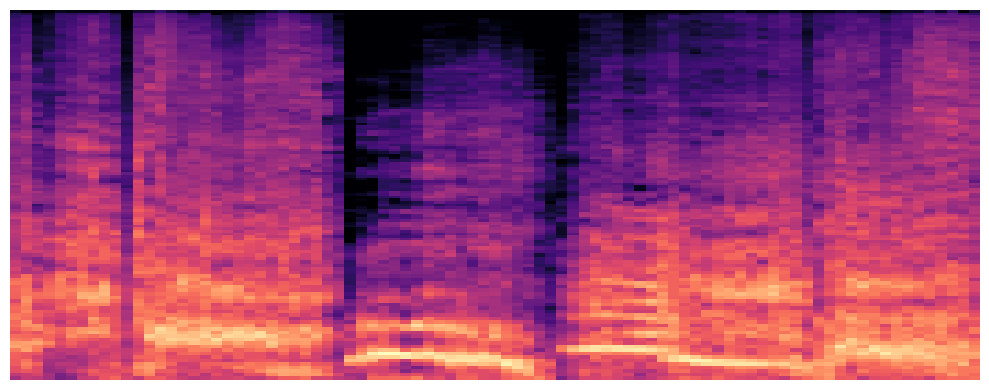

In [ ]:

audio_file_path = r'D:\Research\Journal\sound_segments\Tiger_segment_15846.wav'
y, sr = librosa.load(audio_file_path)


mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024, n_mels=128)


mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import cv2

image = cv2.imread(r'D:\Research\Journal\mel_spectrogram_output\Afganisthan_Pashto_Music_segment_356_mel_spectrogram.png')
height, width, channels = image.shape
print(f"Image dimensions: width = {width}, height = {height}")


In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


metadata_path = '/content/output_directory_2/segments_info.csv'
metadata = pd.read_csv(metadata_path)


audio_filenames = metadata['slice_file_name'].tolist()
labels = metadata['classID'].tolist()
class_names = metadata['class_name'].tolist()


image_directory = '/content/mel_spectrogram_output'


image_filenames = [os.path.join(image_directory, f"{os.path.splitext(audio_filename)[0]}_mel_spectrogram.png") for audio_filename in audio_filenames]


label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_names)


num_classes = len(label_encoder.classes_)


class_labels = label_encoder.inverse_transform(encoded_labels)


X_train, X_test, y_train, y_test = train_test_split(image_filenames, class_labels, test_size=0.2, random_state=42)

# # Split the data into training and testing sets
# indices = np.arange(len(image_filenames))
# train_indices, test_indices = train_test_split(indices, test_size=0.2, random_state=42)

# X_train = [image_filenames[i] for i in train_indices]
# y_train = [str(encoded_labels[i]) for i in train_indices]  # Convert to strings
# X_test = [image_filenames[i] for i in test_indices]
# y_test = [str(encoded_labels[i]) for i in test_indices]  # Convert to strings
height=128
width = 256
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


train_df = pd.DataFrame({'filename': X_train, 'class': y_train})
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=image_directory,  
    target_size=(height, width),
    x_col='filename',
    y_col='class',
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

validation_df = pd.DataFrame({'filename': X_test, 'class': y_test})
validation_generator = datagen.flow_from_dataframe(
    validation_df,
    directory=image_directory,  
    target_size=(height, width),
    x_col='filename',
    y_col='class',
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


epochs = 15
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

model.save('/content/mel_spectrogram_classification_model.h5')